# Train Plots

## Read Data

## Plots

# Test Plots

## Read Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Read CSV files from the directory
csv_path = 'runs/test/exp3/'
results = 'test_results.csv'
summary = 'test_summary.csv'

df_results = pd.read_csv(csv_path + results)  # Replace 'data.csv' with the actual file name
print(df_results.head())

df_summary = pd.read_csv(csv_path + summary)  # Replace 'summary.csv' with the actual file name
print(df_summary.head())

   distance_gt  distance_pred  mean_vertex_dist  trans_dist  angle_dist  \
0     4.550000       4.684610          0.134599    0.134958    1.146996   
1    16.320999      16.994588          0.675809    0.675821    0.974177   
2    31.851999      31.940578          0.164344    0.163183    3.411148   
3     4.603000       4.592134          0.039220    0.038491    1.731082   
4     3.934000       3.998862          0.066045    0.066153    1.029511   

   mean_corner_dist       iou  z_axis_angle_error  heading_error  diam  
0          2.815907  0.910580            0.874828       3.869654   0.2  
1          1.575907  0.753639            0.962779       1.446397   0.2  
2          3.179279  0.424872            3.183870      15.474880   0.2  
3          6.129469  0.858994            1.626971       7.959793   0.2  
4          2.576745  0.906644            0.961526       4.712696   0.2  
   mean_corner_err_2d  pixel_threshold  vertex_threshold      acc2d     acc3d  \
0            2.784074         

## Plots


### Plot translation distance over distance

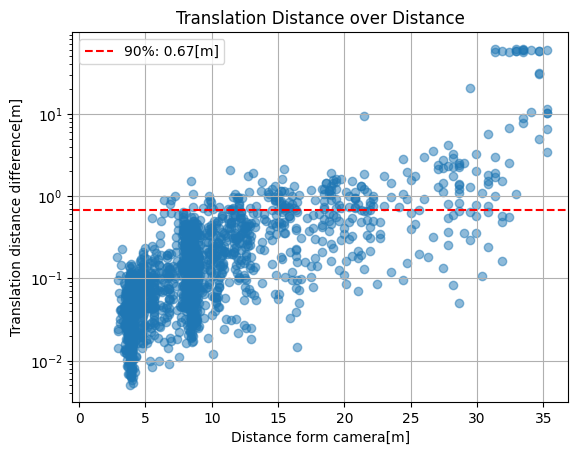

In [35]:
# it is a distance between t_pred and t_gt
plt.scatter(df_results['distance_gt'], df_results['trans_dist'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['trans_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
plt.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[m]')
plt.legend()

plt.xlim(-0.5)
plt.yscale('log')
plt.title('Translation Distance over Distance')
plt.xlabel('Distance form camera[m]')
plt.ylabel('Translation distance difference[m]')
plt.grid(True)
plt.show()

### Plot rotation distance over distance

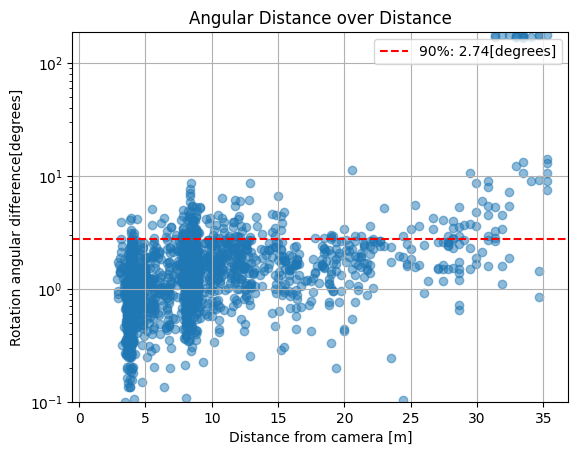

In [ ]:
plt.scatter(df_results['distance_gt'], df_results['angle_dist'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['angle_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
plt.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
plt.legend()

plt.xlim(-0.5)
plt.yscale('log')
plt.title('Angular Distance over Distance')
plt.xlabel('Distance from camera [m]')
plt.ylabel('Rotation angular difference[degrees]')
plt.grid(True)
plt.show()

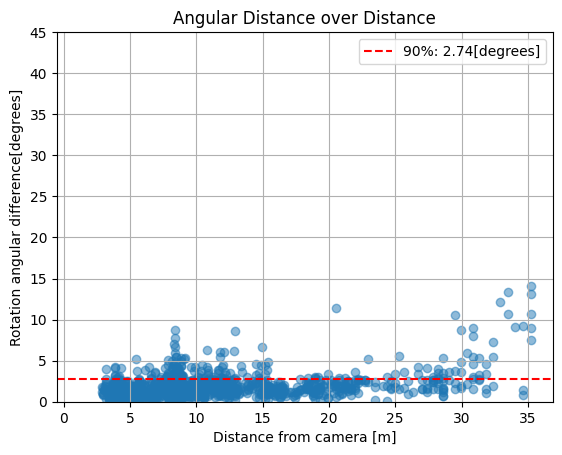

In [34]:
plt.scatter(df_results['distance_gt'], df_results['angle_dist'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['angle_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
plt.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
plt.legend()

plt.xlim(-0.5)
plt.ylim(0, 45)
plt.title('Angular Distance over Distance')
plt.xlabel('Distance from camera [m]')
plt.ylabel('Rotation angular difference[degrees]')
plt.grid(True)
plt.show()

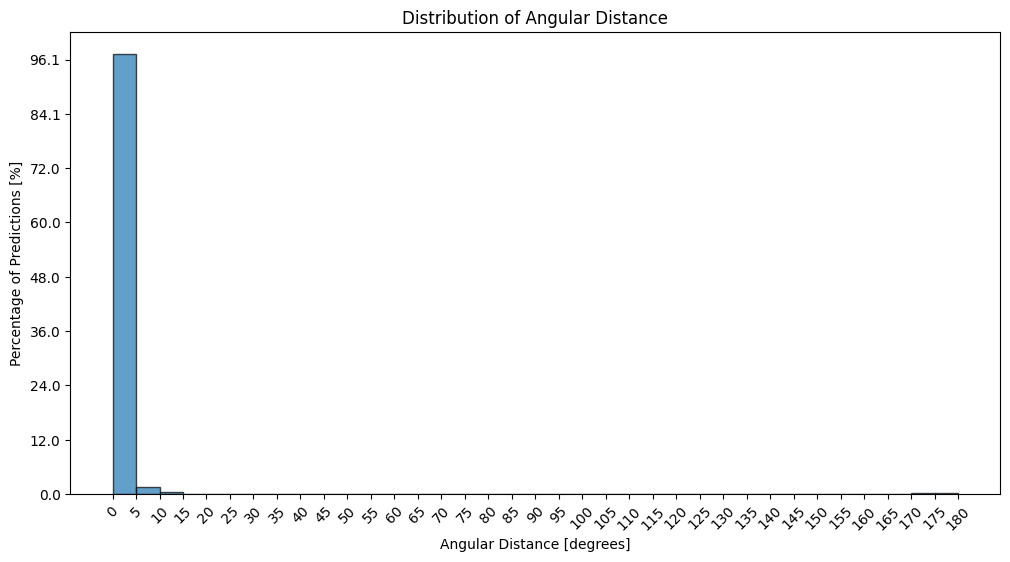

In [36]:
# Define bins for the histogram
bins = range(0, int(df_results['angle_dist'].max()) + 5, 5)

# Plot the histogram
counts, _, _ = plt.hist(df_results['angle_dist'], bins=bins, edgecolor='black', alpha=0.7)

plt.title('Distribution of Angular Distance')
plt.xlabel('Angular Distance [degrees]')
plt.ylabel('Percentage of Predictions [%]')
plt.xticks(bins, rotation=45)
plt.gcf().set_size_inches(12, 6)  # Set the figure size to make the plot wider
total_predictions = len(df_results)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))



### Corner distance over distance

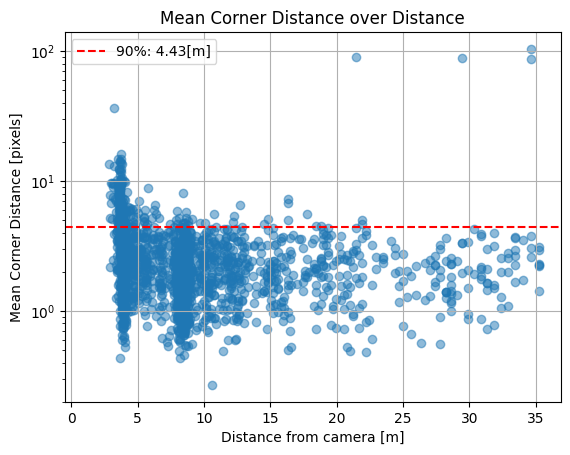

In [37]:
plt.scatter(df_results['distance_gt'], df_results['mean_corner_dist'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['mean_corner_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
plt.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[m]')
plt.legend()

plt.xlim(-0.5)
plt.title('Mean Corner Distance over Distance')
plt.yscale('log')
plt.xlabel('Distance from camera [m]')
plt.ylabel('Mean Corner Distance [pixels]')
plt.grid(True)
plt.show()

# zkusit to udelat relativne na velikost obrazku, Zapamatovat diameter. 

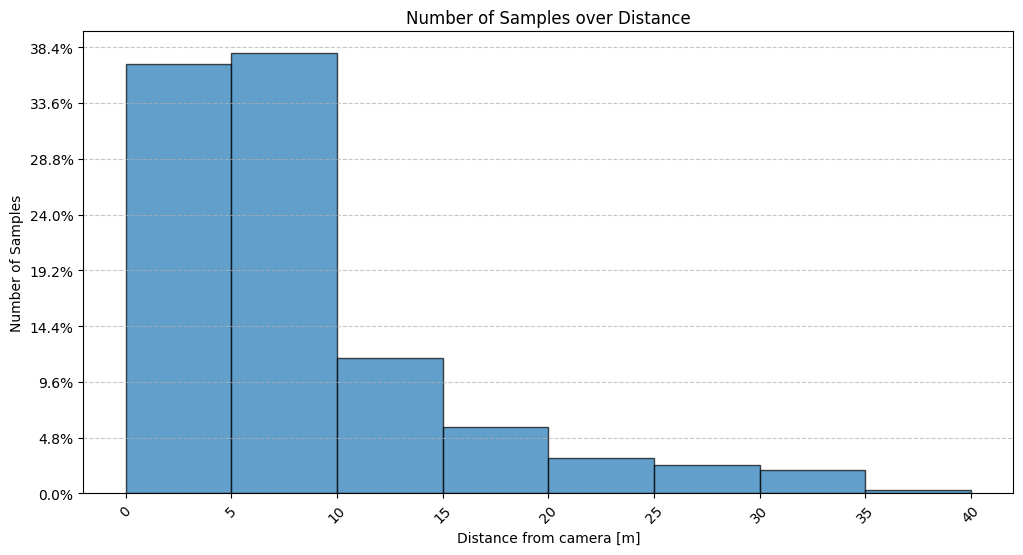

In [14]:
# number of samples over distance
# Define bins for the histogram
bins = range(0, int(df_results['distance_gt'].max()) + 6, 5)

# Plot the histogram
plt.hist(df_results['distance_gt'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Number of Samples over Distance')
plt.xlabel('Distance from camera [m]')
plt.ylabel('Number of Samples')
plt.xticks(bins, rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / len(df_results)) * 100:.1f}%'))
plt.gcf().set_size_inches(12, 6)  # Set the figure size to make the plot wider
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

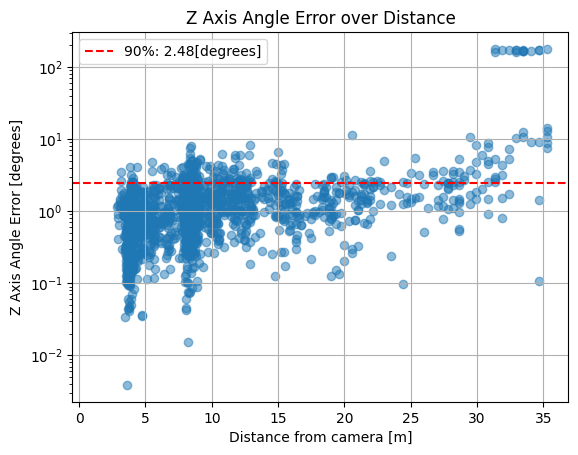

In [38]:
# osa Z
plt.scatter(df_results['distance_gt'], df_results['z_axis_angle_error'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['z_axis_angle_error'].quantile(0.9)

# Add a horizontal line at the 90th percentile
plt.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
plt.legend()

plt.xlim(-0.5)
plt.title('Z Axis Angle Error over Distance')
plt.yscale('log')
plt.xlabel('Distance from camera [m]')
plt.ylabel('Z Axis Angle Error [degrees]')
plt.grid(True)
plt.show()

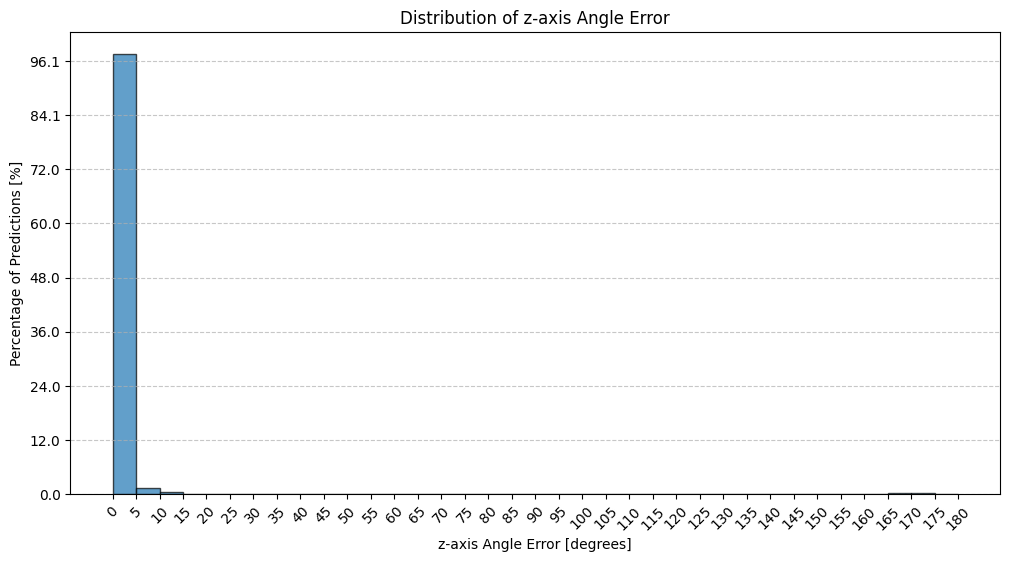

In [ ]:
# Define bins for the histogram
bins = range(0, int(df_results['z_axis_angle_error'].max()) + 5, 5)

# Plot the histogram
plt.hist(df_results['z_axis_angle_error'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of z-axis Orientation Error')
plt.xlabel('z-axis Orientation Error [degrees]')
plt.ylabel('Percentage of Predictions [%]')
plt.xticks(bins, rotation=45)
plt.gcf().set_size_inches(12, 6)  # Set the figure size to make the plot wider
total_predictions = len(df_results)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

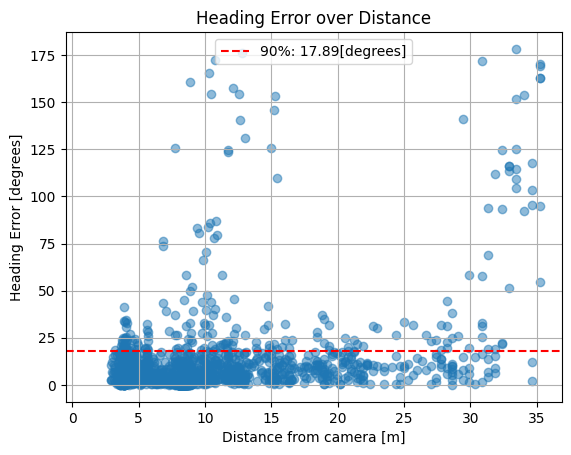

In [ ]:
# Heading 
plt.scatter(df_results['distance_gt'], df_results['heading_error'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['heading_error'].quantile(0.9)

# Add a horizontal line at the 90th percentile
plt.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
plt.legend()

plt.xlim(-0.5)
plt.title('Heading Error over Distance')
plt.xlabel('Distance from camera [m]')
plt.ylabel('Heading Error [degrees]')
plt.grid(True)
plt.show()

In [ ]:
# Error in x y z , where x is vector heading in the direction of target. 

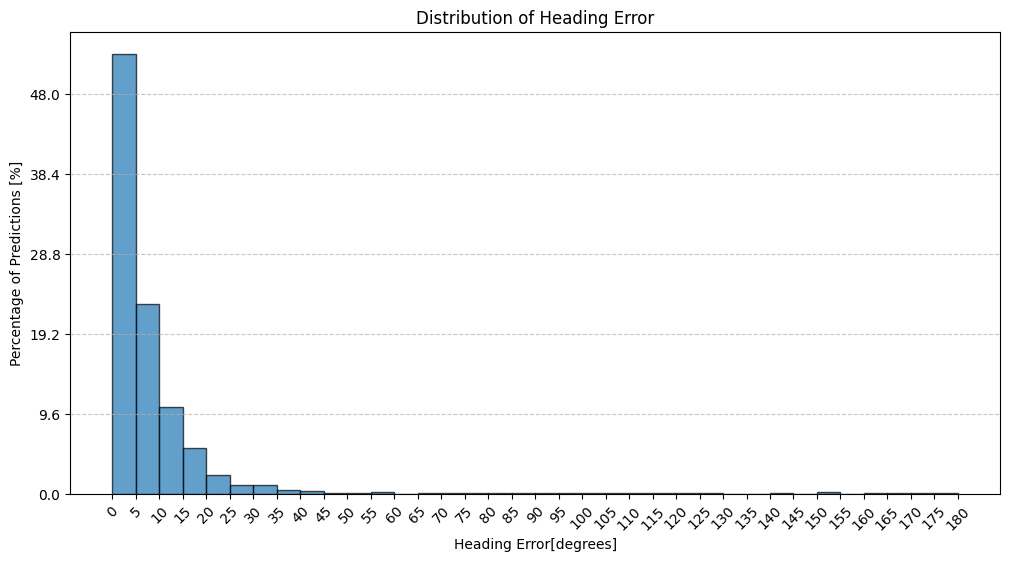

In [ ]:
# distribution of orientation. RPY, heading, axis z

# Define bins for the histogram
bins = range(0, int(df_results['heading_error'].max()) + 5, 5)

# Plot the histogram
plt.hist(df_results['heading_error'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Heading Error')
plt.xlabel('Heading Error [degrees]')
plt.ylabel('Percentage of Predictions [%]')
plt.xticks(bins, rotation=45)
plt.gcf().set_size_inches(12, 6)  # Set the figure size to make the plot wider
total_predictions = len(df_results)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()